In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib'in görselleri düzgün göstermesi için
%matplotlib inline

In [ ]:

# Drive'daki dosyaların olduğu klasör yolunu belirle
folder_path = "/content/drive/My Drive/bisikletödevi"

# Tüm CSV dosyalarının yollarını al
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Dosyaları birleştir
data = pd.concat([pd.read_csv(f) for f in file_paths], ignore_index=True)

# İlk 5 satırı gör
print(data.head())


            ride_id  rideable_type           started_at             ended_at  \
0  2B22BD5F95FB2629  electric_bike  2020-09-17 14:27:11  2020-09-17 14:44:24   
1  A7FB70B4AFC6CAF2  electric_bike  2020-09-17 15:07:31  2020-09-17 15:07:45   
2  86057FA01BAC778E  electric_bike  2020-09-17 15:09:04  2020-09-17 15:09:35   
3  57F6DC9A153DB98C  electric_bike  2020-09-17 18:10:46  2020-09-17 18:35:49   
4  B9C4712F78C1AE68  electric_bike  2020-09-17 15:16:13  2020-09-17 15:52:55   

               start_station_name start_station_id  \
0          Michigan Ave & Lake St             52.0   
1      W Oakdale Ave & N Broadway              NaN   
2      W Oakdale Ave & N Broadway              NaN   
3  Ashland Ave & Belle Plaine Ave            246.0   
4        Fairbanks Ct & Grand Ave             24.0   

             end_station_name end_station_id  start_lat  start_lng    end_lat  \
0      Green St & Randolph St          112.0  41.886692 -87.623561  41.883570   
1  W Oakdale Ave & N Broadway   

In [ ]:
# Veri türlerini ve genel bilgileri kontrol et
print(data.info())

# Eksik değerleri kontrol et
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913072 entries, 0 to 4913071
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 487.3+ MB
None
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    450045
start_station_id      450571
end_station_name      491380
end_station_id        491764
start_lat                  0
start_lng                  0
end_lat                 5015
end_lng       

In [ ]:
# Eksik değerleri temizle
data = data.dropna()

# Temizlenmiş veriyi kontrol et
print(data.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


In [ ]:
# Tarih sütunlarını datetime formatına çevir
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

# Sürüş süresini dakika cinsinden hesapla
data['ride_length'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60

# Sürüş süresiyle ilgili bir önizleme
print(data[['started_at', 'ended_at', 'ride_length']].head())

            started_at            ended_at  ride_length
0  2020-09-17 14:27:11 2020-09-17 14:44:24    17.216667
3  2020-09-17 18:10:46 2020-09-17 18:35:49    25.050000
4  2020-09-17 15:16:13 2020-09-17 15:52:55    36.700000
6  2020-09-16 21:39:57 2020-09-16 21:53:44    13.783333
10 2020-09-16 22:58:41 2020-09-17 00:09:31    70.833333


In [ ]:
# Negatif veya anormal sürüş sürelerini filtrele
data = data[data['ride_length'] > 0]

# Genel bir özet
print(data['ride_length'].describe())

count    4.227857e+06
mean     2.332298e+01
std      2.070143e+02
min      1.666667e-02
25%      7.316667e+00
50%      1.293333e+01
75%      2.348333e+01
max      5.594415e+04
Name: ride_length, dtype: float64


In [ ]:
# Anormal derecede uzun sürüş sürelerini filtrele (1440 dakika = 24 saat)
data = data[data['ride_length'] <= 1440]

# Güncellenmiş genel bir özet
print(data['ride_length'].describe())

count    4.226334e+06
mean     2.097536e+01
std      3.743210e+01
min      1.666667e-02
25%      7.316667e+00
50%      1.293333e+01
75%      2.346667e+01
max      1.439900e+03
Name: ride_length, dtype: float64


<ipython-input-8-d27d1910c57f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='member_casual', y='ride_length', palette='coolwarm')


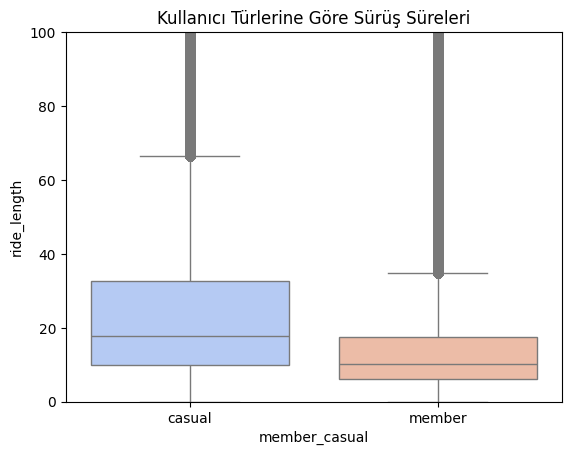

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kullanıcı türlerine göre sürüş sürelerini görselleştir
sns.boxplot(data=data, x='member_casual', y='ride_length', palette='coolwarm')
plt.title("Kullanıcı Türlerine Göre Sürüş Süreleri")
plt.ylim(0, 100)  # Aşırı uçları hariç tutmak için bir limit belirle
plt.show()

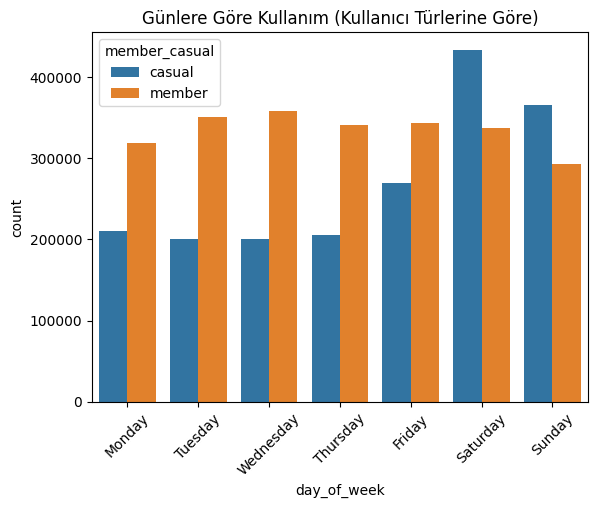

In [ ]:
# Gün sütununu ekle
data['day_of_week'] = data['started_at'].dt.day_name()

# Günlere göre kullanım
sns.countplot(data=data, x='day_of_week', hue='member_casual', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Günlere Göre Kullanım (Kullanıcı Türlerine Göre)")
plt.xticks(rotation=45)
plt.show()

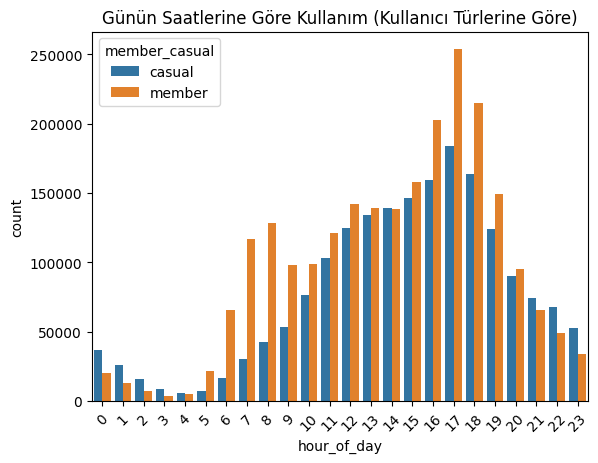

In [ ]:
data['hour_of_day'] = data['started_at'].dt.hour
sns.countplot(data=data, x='hour_of_day', hue='member_casual')
plt.title("Günün Saatlerine Göre Kullanım (Kullanıcı Türlerine Göre)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(data.groupby('member_casual')['ride_length'].mean())
print(data.groupby('member_casual')['ride_length'].sum())

member_casual
casual    29.819889
member    13.860577
Name: ride_length, dtype: float64
member_casual
casual    5.618461e+07
member    3.246427e+07
Name: ride_length, dtype: float64


In [ ]:
print(data.groupby(['start_station_name', 'member_casual']).size().sort_values(ascending=False).head(10))

start_station_name         member_casual
Streeter Dr & Grand Ave    casual           55303
Millennium Park            casual           30234
Michigan Ave & Oak St      casual           26890
Lake Shore Dr & Monroe St  casual           26407
Clark St & Elm St          member           23296
Theater on the Lake        casual           21324
Wells St & Concord Ln      member           20589
Shedd Aquarium             casual           20571
Kingsbury St & Kinzie St   member           19861
Wells St & Elm St          member           18742
dtype: int64


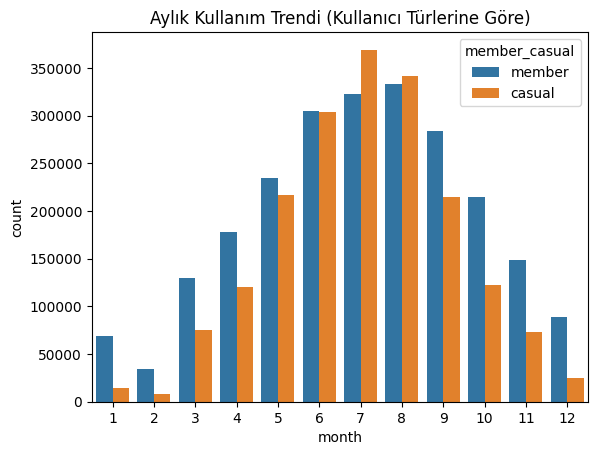

In [ ]:
data['month'] = data['started_at'].dt.month
sns.countplot(data=data, x='month', hue='member_casual')
plt.title("Aylık Kullanım Trendi (Kullanıcı Türlerine Göre)")
plt.show()

In [ ]:
print(data['member_casual'].value_counts())

member_casual
member    2342202
casual    1884132
Name: count, dtype: int64


In [ ]:
print(data['start_station_name'].value_counts().head(10))
print(data['end_station_name'].value_counts().head(10))


start_station_name
Streeter Dr & Grand Ave       69770
Michigan Ave & Oak St         40156
Clark St & Elm St             38177
Theater on the Lake           37740
Millennium Park               37364
Wells St & Concord Ln         37218
Lake Shore Dr & Monroe St     34987
Wells St & Elm St             32956
Lake Shore Dr & North Blvd    31169
Clark St & Armitage Ave       30220
Name: count, dtype: int64
end_station_name
Streeter Dr & Grand Ave       71422
Michigan Ave & Oak St         41151
Millennium Park               39219
Theater on the Lake           38738
Clark St & Elm St             37880
Wells St & Concord Ln         37776
Lake Shore Dr & North Blvd    34947
Lake Shore Dr & Monroe St     34095
Wells St & Elm St             32590
Clark St & Lincoln Ave        30349
Name: count, dtype: int64


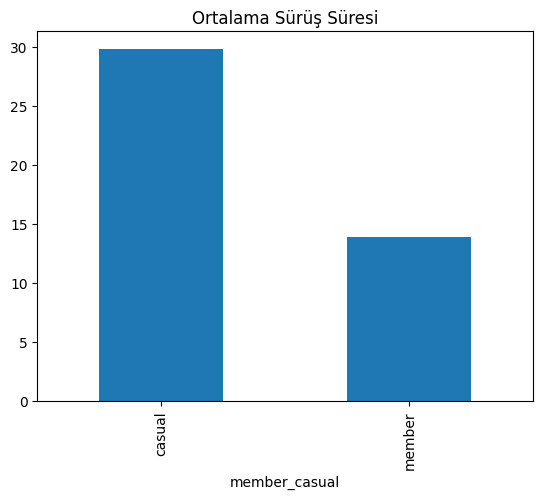

In [ ]:
data.groupby('member_casual')['ride_length'].mean().plot(kind='bar', title="Ortalama Sürüş Süresi")
plt.show()

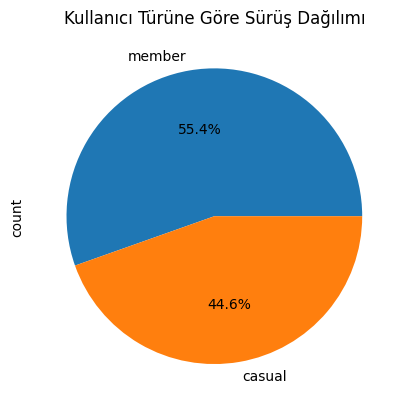

In [ ]:
data['member_casual'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Kullanıcı Türüne Göre Sürüş Dağılımı")
plt.show()

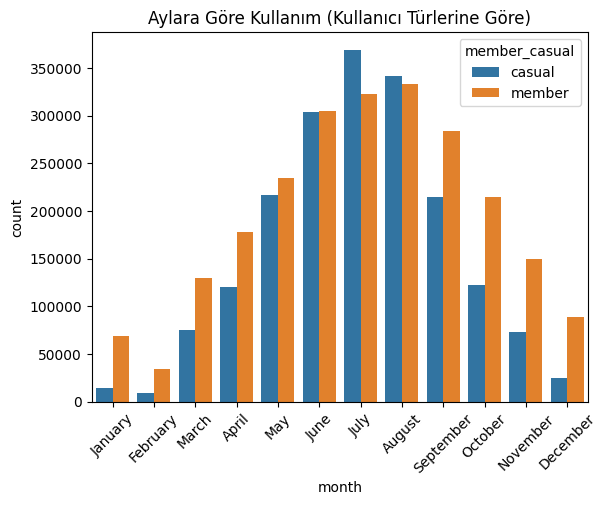

In [ ]:
# Tarihten ay bilgisini çıkar
data['month'] = data['started_at'].dt.month_name()

# Kullanıcı türüne göre aylık kullanım grafiği
sns.countplot(data=data, x='month', hue='member_casual', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.title("Aylara Göre Kullanım (Kullanıcı Türlerine Göre)")
plt.xticks(rotation=45)
plt.show()

member_casual  day_type
casual         weekday     27.456982
               weekend     33.030119
member         weekday     13.229773
               weekend     15.572090
Name: ride_length, dtype: float64


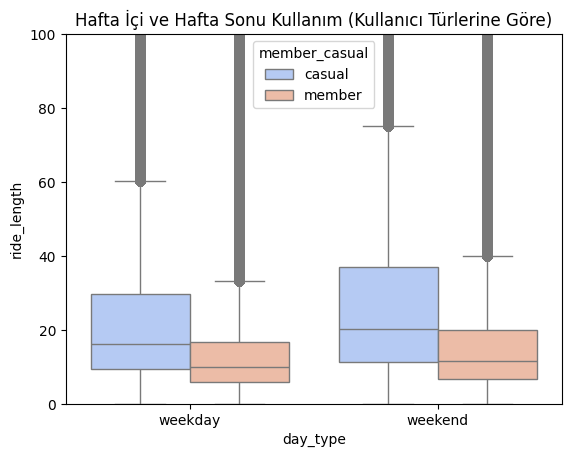

In [ ]:
# Hafta içi ve hafta sonu etiketleri ekle
data['day_type'] = data['day_of_week'].apply(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')

# Kullanıcı türüne göre sürüş sürelerinin ortalaması
print(data.groupby(['member_casual', 'day_type'])['ride_length'].mean())

# Kullanıcı türüne göre görselleştirme
sns.boxplot(data=data, x='day_type', y='ride_length', hue='member_casual', palette='coolwarm')
plt.title("Hafta İçi ve Hafta Sonu Kullanım (Kullanıcı Türlerine Göre)")
plt.ylim(0, 100)  # Outlier'ları hariç tutmak için limit
plt.show()

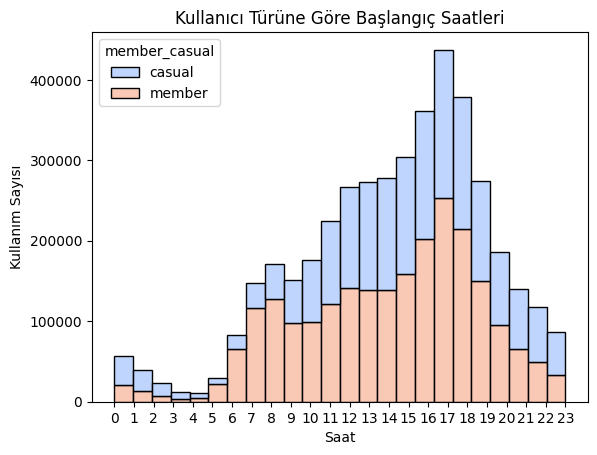

In [ ]:
# Kullanıcı türüne göre başlangıç saatlerini görselleştir
sns.histplot(data=data, x='hour_of_day', hue='member_casual', kde=False, multiple='stack', palette='coolwarm', bins=24)
plt.title("Kullanıcı Türüne Göre Başlangıç Saatleri")
plt.xlabel("Saat")
plt.ylabel("Kullanım Sayısı")
plt.xticks(range(0, 24))  # Saat dilimlerini net göstermek için
plt.show()

# Bitiş saatlerini analiz etmek istersen aynı yöntemi 'ended_at' sütunundan alınan saatlerle de yapabilirsin.